# Seaborn

In [1]:
import seaborn as sns
sns.set() # Ponemos el estilo de seaborn

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Gráfico de líneas

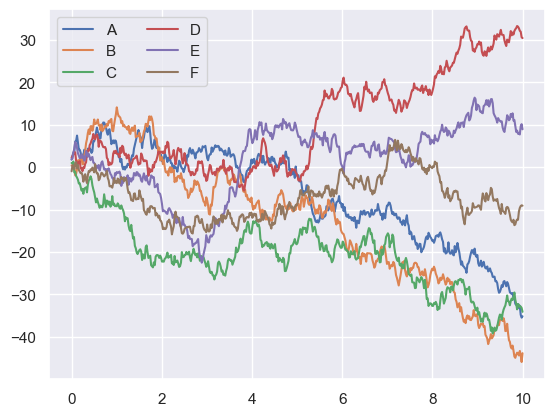

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

## Histogramas

Text(0.5, 0, '')

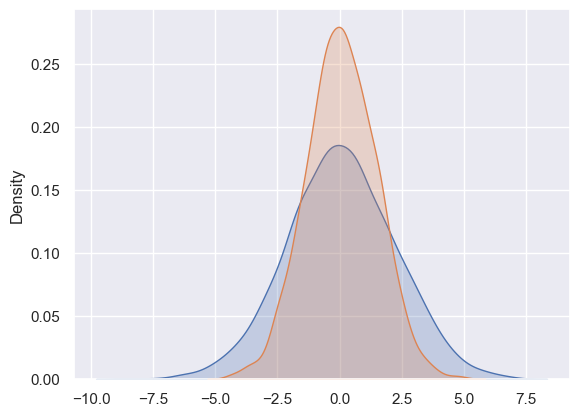

In [11]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    sns.kdeplot(data[col], fill=True)
plt.xlabel('');



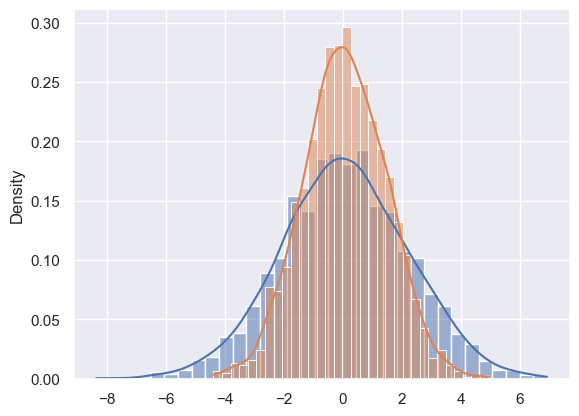

In [12]:
for col in 'xy':
    sns.histplot(data[col], kde=True,stat = 'density')
plt.xlabel('');

## Joint y pairplots

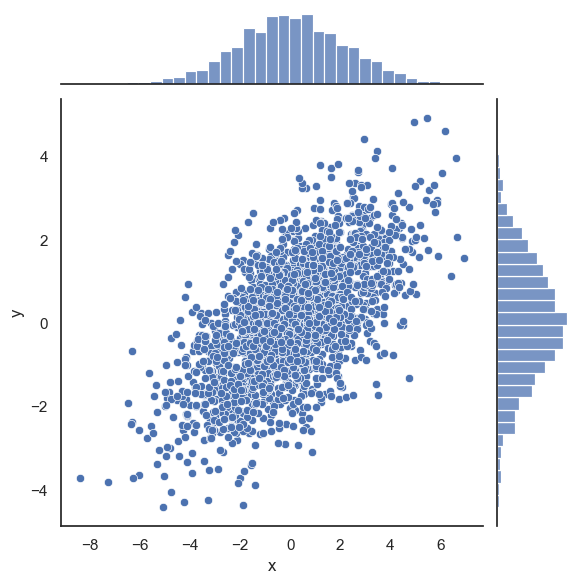

In [18]:
with sns.axes_style('white'):
    sns.jointplot(data=data,x="x",y="y", kind='scatter'); #kde, hex, scater, reg

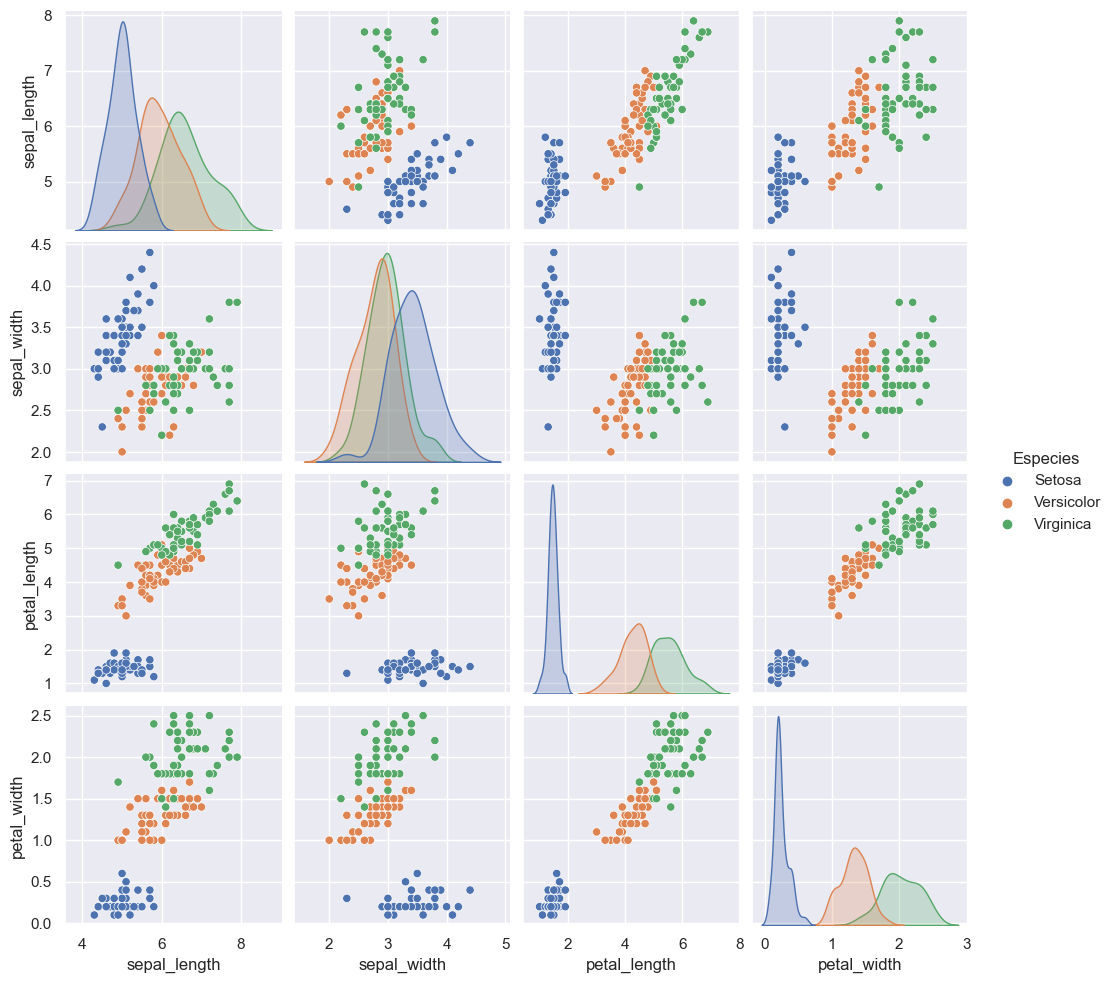

In [24]:
iris = sns.load_dataset("iris")
iris.head()
iris['species'] = iris['species'].str.capitalize()
g = sns.pairplot(iris, hue='species', height=2.5);
g._legend.set_title('Especies')
#new_labels = ['label 1', 'label 2']
#for t, l in zip(leg.texts, new_labels):
#    t.set_text(l)

## Facet grid

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


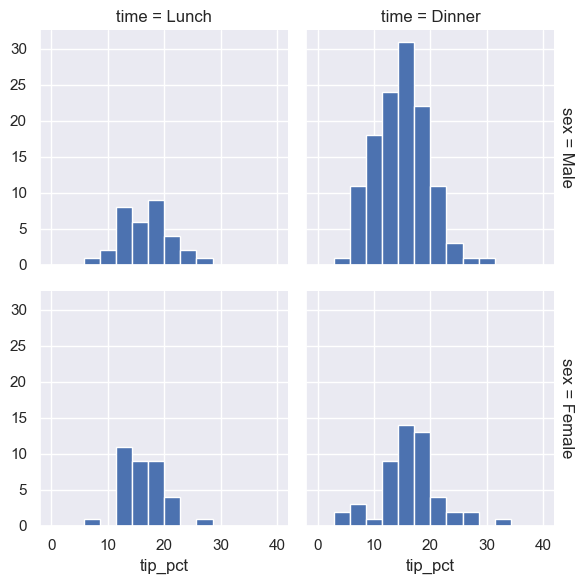

In [39]:
tips = sns.load_dataset('tips')
print(tips.head())
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
#Aplicamos un mismo gráfico según alguna variable
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

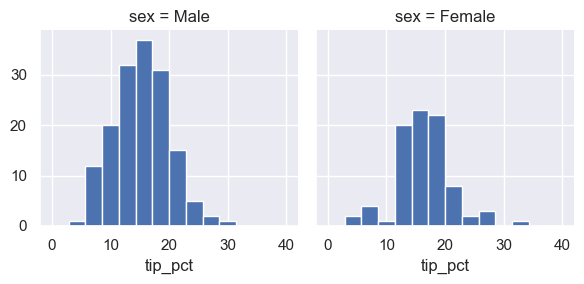

In [27]:
grid = sns.FacetGrid(tips, col="sex", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

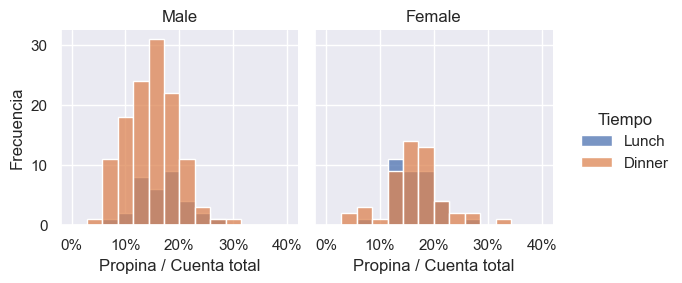

In [49]:
grid = sns.FacetGrid(tips, col="sex", margin_titles=True,hue='time',sharex=True)
grid.map(sns.histplot, "tip_pct", bins=np.linspace(0, 40, 15))
grid.set_axis_labels('Propina / Cuenta total','Frecuencia')
grid.set_titles(col_template='{col_name}')
for ax in grid.axes.flat:
    ax.xaxis.set_major_formatter(lambda x, p: f'{x:.0f}%')
grid.add_legend(title = 'Tiempo')

In [ ]:
- relplot
- distplot
- catplot
- lmplot

## Catplot

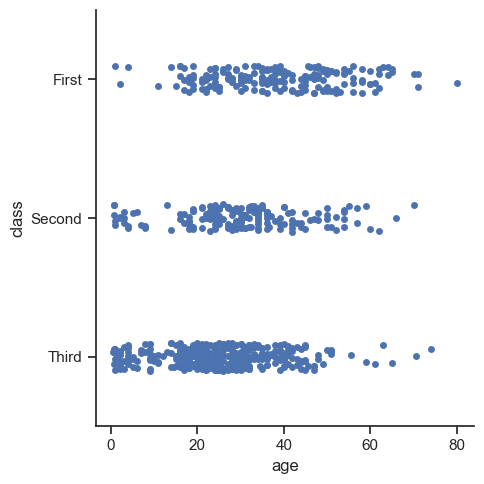

In [52]:
df = sns.load_dataset("titanic")
sns.catplot(data=df, x="age", y="class") #kind: box, boxen, violin

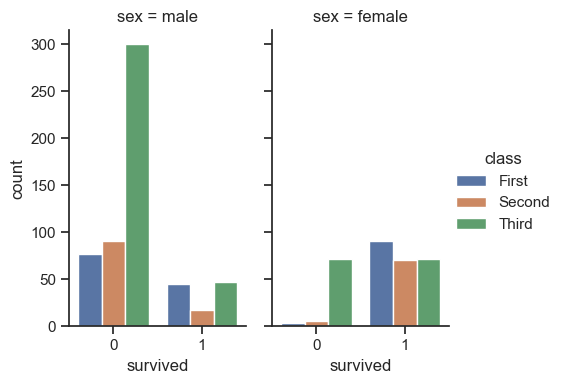

In [58]:
sns.catplot(
    data=df, hue="class", x="survived", col="sex",
    kind="count", height=4, aspect=.6,
)

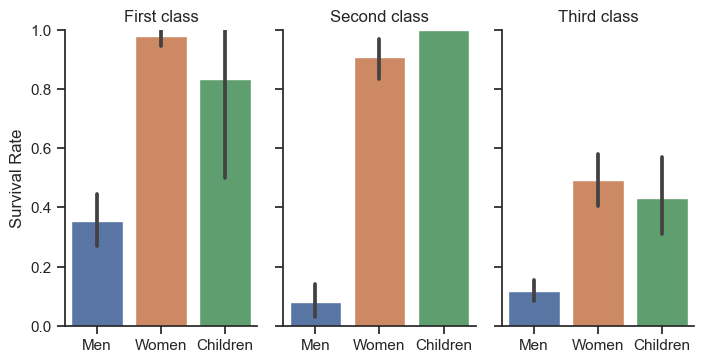

In [56]:
g = sns.catplot(
    data=df, x="who", y="survived", col="class",
    kind="bar", height=4, aspect=.6,
)
g.set_axis_labels("", "Survival Rate")
g.set_xticklabels(["Men", "Women", "Children"])
g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)

## Boxplots

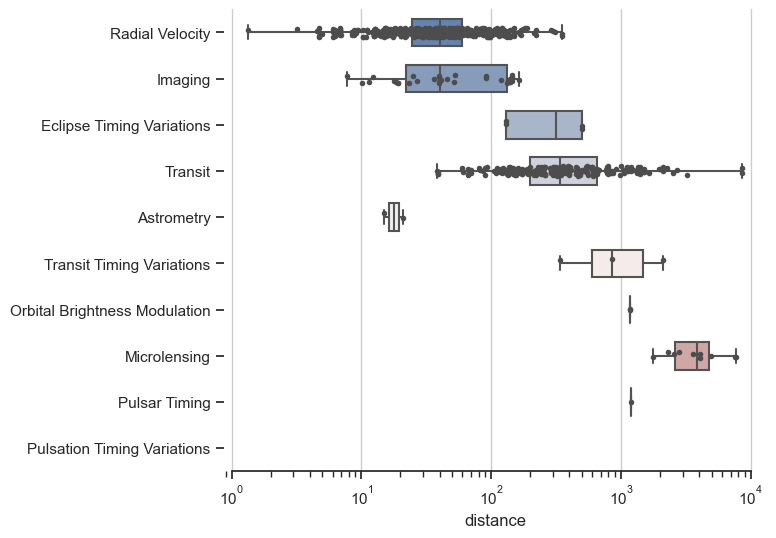

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

## Fechas

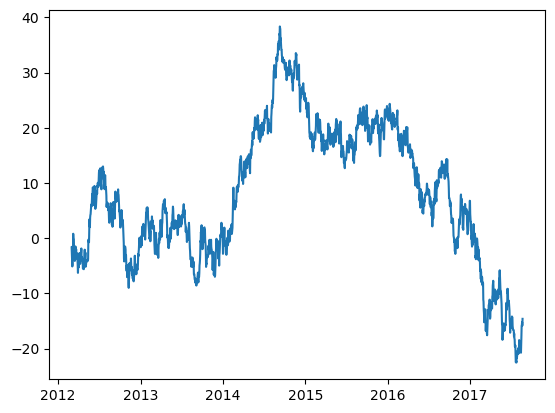

In [12]:
from numpy import cumsum
from numpy.random import randn
from matplotlib.pyplot import figure, draw
import matplotlib.dates as mdates
import datetime as dt
# Simulate data
T = 2000
x = []
for i in range(T):
    x.append(dt.datetime(2012,3,1)+dt.timedelta(i,0,0))
y = cumsum(randn(T))

fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

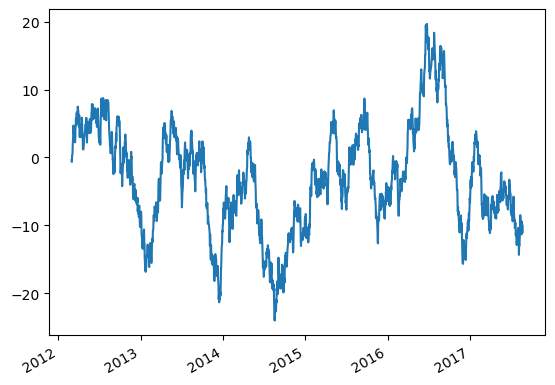

In [9]:
fig.autofmt_xdate()
fig

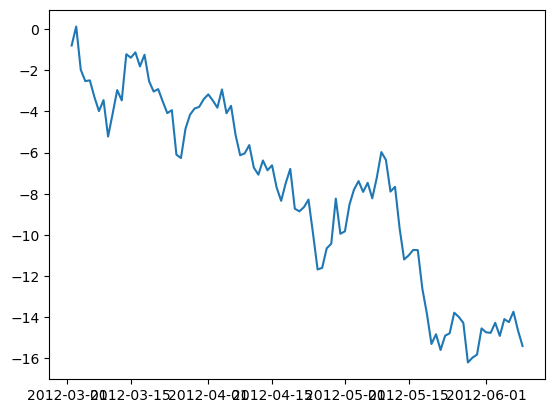

In [16]:
T = 100
x = []
for i in range(1,T+1):
    x.append(dt.datetime(2012,3,1)+dt.timedelta(i,0,0))
y = cumsum(randn(T))
fig = figure()
ax = fig.add_subplot(111)
ax.plot(x,y)

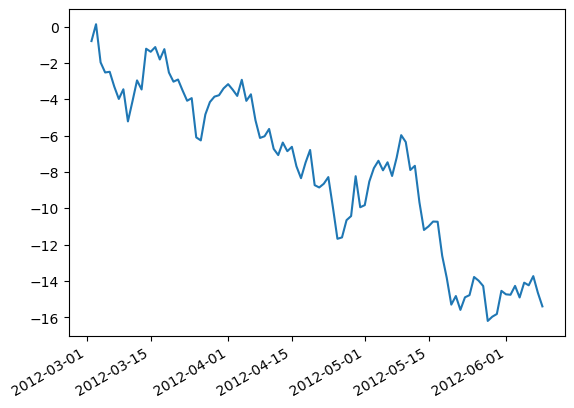

In [17]:
fig.autofmt_xdate()
fig

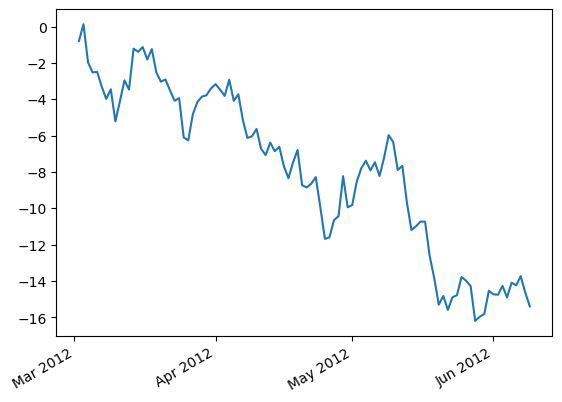

In [20]:
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
fmt = mdates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(fmt)
fig.autofmt_xdate()
fig

In [39]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()
atvi = pdr.get_data_yahoo('ATVI', start='2015-03-01', end='2023-04-30')

atvi.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-03-02,23.320000,23.350000,23.080000,23.250000,22.009136,7236600
2015-03-03,23.250000,23.260000,23.049999,23.100000,21.867144,5073700
2015-03-04,23.010000,23.100000,22.709999,22.930000,21.706215,5290200
2015-03-05,22.910000,23.370001,22.900000,23.290001,22.047003,5925900
2015-03-06,23.120001,23.340000,22.969999,23.070000,21.838741,4649100


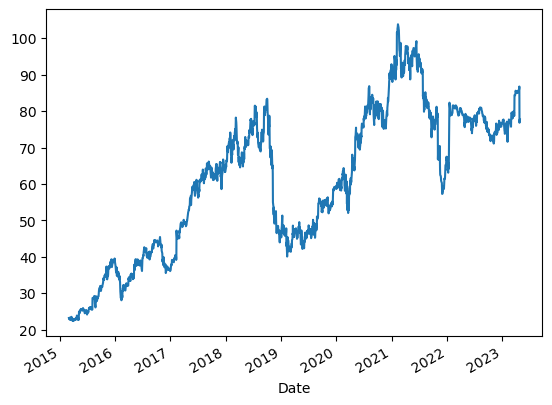

In [40]:
atvi = atvi['Close']
atvi.plot();

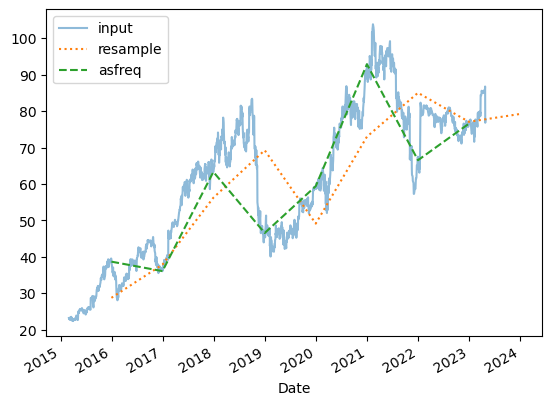

In [41]:
atvi.plot(alpha=0.5, style='-')
atvi.resample('BA').mean().plot(style=':') #Muestreo a una frecuencia mayor
atvi.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],loc='upper left');

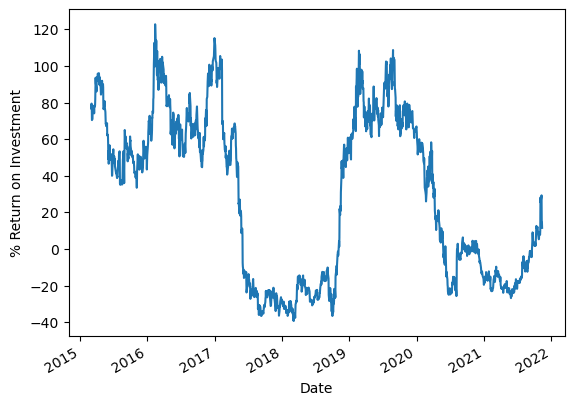

In [51]:
ROI = 100 * (atvi.shift(-365) / atvi - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

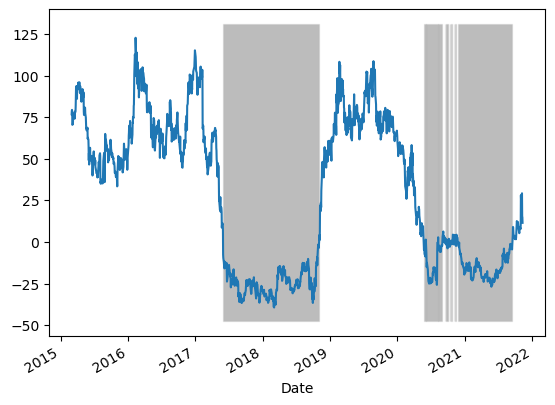

In [55]:
z = ROI < 0
ROI.plot()
limits = plt.axis()
plt.fill_between(ROI.index, limits[2], limits[3], where=z, edgecolor='#BBBBBB', \
                 facecolor='#222222', alpha=0.3)

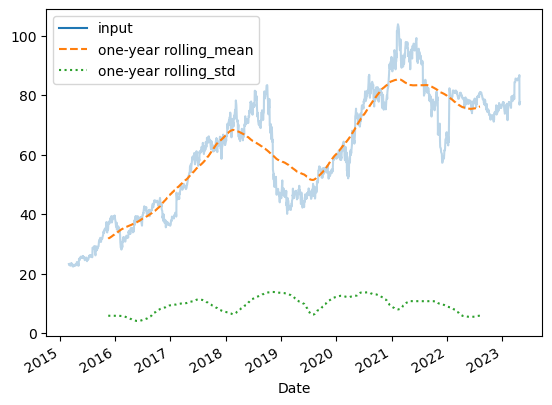

In [52]:
rolling = atvi.rolling(365, center=True)
data = pd.DataFrame({'input': atvi,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)

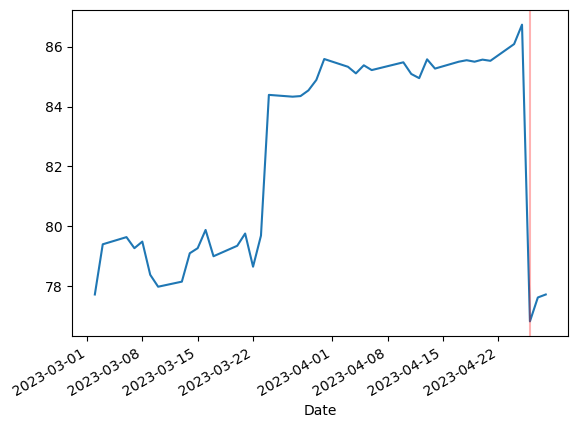

In [49]:
atvi_reciente = atvi[atvi.index > pd.to_datetime('2023-03-01')]
atvi_reciente.plot();
plt.axvline(pd.to_datetime('2023-04-26'), alpha=0.3, color='red');